## 미로찾기 (maze)
<a href = "https://www.youtube.com/watch?v=5Q3L_kNCzw0">유튜브 권호음님</a> 

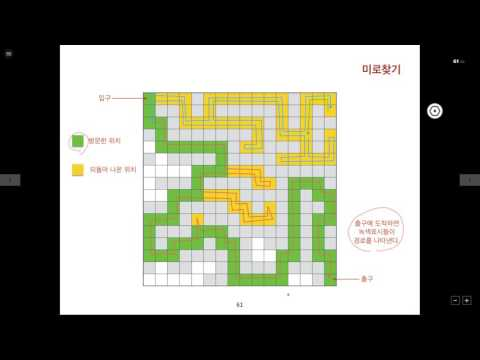

In [19]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('5Q3L_kNCzw0')

- stack
- queue
- recursion

<img src="https://www.laurentluce.com/images/blog/maze/maze.png">

- 2차원 배열 $n * n$
- 입구 (0, 0)
- 출구 (n-1, n-1)

- 이미 방문한 위치에는 표시를 해서 무한루프를 방지한다.
- 현재 위치에서 일정한 규칙으로 다음 위치로 이동한다.
    - 북, 동, 남, 서 순서로 검사하여,
    - 그 방향으로 갈 수 있으면, 즉 아직 안 가본 위치면서 벽이 아니면 그 방향으로 간다.
- 아무 방향으로도 갈 수 없으면 그 위치에 오기 직전 위치로 되돌아 간다.